In [ ]:
capture log close

In [ ]:
capture log using "..\log\empirical_exercise8"

In [ ]:
/****************************************************************************
* File name: empirical_exercise8.do
* Author(s): Sze, J.
* Date: 4/5/2019
* Description: 
* Answers to empirical exercise 8 for Labor Economics
*
* Inputs: 
* "..\input_data\Twins Long.dta"
* "..\input_data\Twins Wide.dta"
* Outputs:
* 
***************************************************************************/

In [1]:
cd

C:\Users\jerem\Documents\Labor Economics\dofiles


This week’s exercise uses Ashenfelter and Krueger’s (1994) data from their survey of twins in
Twinsville, Ohio in August 1990. Two files contain data on 149 pairs of identical twins. One
file stacks the data in long form, so it has 298 observations. The other file is in wide form—
one observation per pair with separate variables for twin 1 and twin 2. The files are Twins
Long.dta and Twins Wide.dta. Your task is to produce Ashenfelter and Krueger’s primary
estimates but only on the sample of white twins.

### A. Age versus Experience. 

Use the Twins Long.dta, and keep white workers.<br>

- Create a potential experience variable (experience) as age minus educ minus 6. 
- Regress l_wage on educ, age, female, and uncov. 
- Replace age with experience, and rerun the regression.
- Compare the two sets of regression estimates. In particular, how is the schooling coefficient in the age regression related to the age (or experience) coefficient and the experience regression’s schooling coefficient?

In [2]:
use "..\input_data\Twins Long.dta", clear

(Ashenfelter and Krueger (1994))


In [3]:
describe


Contains data from ..\input_data\Twins Long.dta
  obs:           298                          Ashenfelter and Krueger (1994)
 vars:            12                          4 Apr 2019 07:54
 size:         6,854                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
id              int     %9.0g                 generated id
pairid          int     %9.0g                 id from twins.dta
twin            byte    %9.

In [5]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          id |        298          75    43.08398          1        149
      pairid |        276    233.3913    140.9003          2        499
        twin |        298         1.5     .500841          1          2
         age |        298      36.563    10.36133     18.782      64.14
       agesq |        298    1443.848    836.8125   352.7506   4113.892
-------------+---------------------------------------------------------
      female |        298    .5436242    .4989311          0          1
       white |        298    .9362416     .244733          0          1
        educ |        298    14.11409    2.158782          8         20
      educ_x |        276    14.03623     2.13681         10         20
     lhrwage |        298    2.378629    .6188658   .5108256    4.60517
-------------+-------------------------------------------------

In [6]:
gen experience = age - educ - 6

(bin=17, start=-.21800041, width=2.6432941)


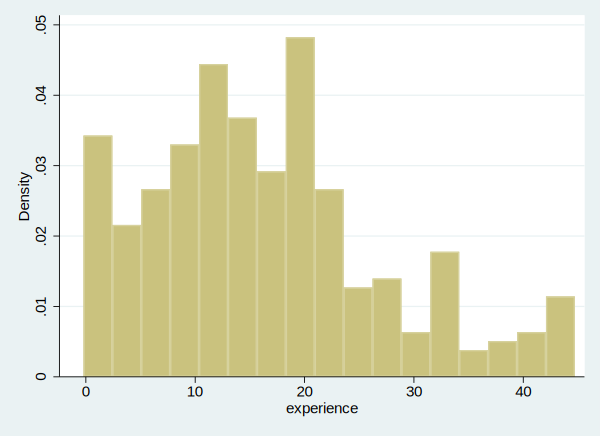

In [7]:
histogram experience

In [14]:
sum age experience


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |        298      36.563    10.36133     18.782      64.14
  experience |        298    16.44891    10.68776  -.2180004     44.718


In [10]:
regress lhrwage age educ female uncov


      Source |       SS           df       MS      Number of obs   =       276
-------------+----------------------------------   F(4, 271)       =     21.99
       Model |  25.4771133         4  6.36927834   Prob > F        =    0.0000
    Residual |  78.4904863       271  .289632791   R-squared       =    0.2450
-------------+----------------------------------   Adj R-squared   =    0.2339
       Total |    103.9676       275  .378063999   Root MSE        =    .53818

------------------------------------------------------------------------------
     lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .0169322    .003208     5.28   0.000     .0106163     .023248
        educ |   .0880134   .0154887     5.68   0.000       .05752    .1185068
      female |  -.1668894   .0674623    -2.47   0.014    -.2997063   -.0340725
       uncov |   .2284342   .0797186     2.87   0.

In [11]:
regress lhrwage experience educ female uncov


      Source |       SS           df       MS      Number of obs   =       276
-------------+----------------------------------   F(4, 271)       =     21.99
       Model |  25.4771133         4  6.36927834   Prob > F        =    0.0000
    Residual |  78.4904863       271  .289632791   R-squared       =    0.2450
-------------+----------------------------------   Adj R-squared   =    0.2339
       Total |    103.9676       275  .378063999   Root MSE        =    .53818

------------------------------------------------------------------------------
     lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  experience |   .0169322    .003208     5.28   0.000     .0106163     .023248
        educ |   .1049455   .0159135     6.59   0.000     .0736157    .1362753
      female |  -.1668894   .0674623    -2.47   0.014    -.2997063   -.0340725
       uncov |   .2284342   .0797186     2.87   0.

The coefficients on age and experience from the two regression are identical. However, the coefficient for education changed between the two models. The comparison of the coefficients on education indicates that when age is held constant, one more year of education has smaller returns than the returns to education when experience is held contant. 

Experience is a variable that is created from education. Typically, you will have to instrument for experience as well. How you interpret the coefficient for education depends on what else is being held constant in the regression. So if you hold age constant, (e.g. among 45 year olds, one more year of education comparing two people of the same age, means the more educated person has 1 less year of experience. So if you hold age fixed, your return to education is net of experience. Here is what you get from having a little bit of extra education minus the year of experience. Holding age fixed, you are going to get a smaller coefficient on education than if you held experience fixed.

### B. Within-Pair Averaging. 
Continue with the stacked data on whites. The variable educ_x is the cross-report (rather than self-report) of education; for instance, in observation _n = 4, twin 2 reports that twin 1 finished 16 years of school (although twin 1’s self-report is 
19 years). 
- Average the self- and cross-reports of education. 
- Regress l_wage on educ, age, agesq, female, married, and uncov. 
- Then, in the regression, replace educ with your new averaged variable. 
- Compare the estimated effects of schooling on log-wages across these two specifications. 
- Does measurement error in educ appear to be much of a problem?

In [15]:
gen educ_avg = (educ_x + educ)/2

(22 missing values generated)


In [16]:
regress lhrwage educ age agesq female married uncov


      Source |       SS           df       MS      Number of obs   =       276
-------------+----------------------------------   F(6, 269)       =     16.89
       Model |   28.446974         6  4.74116233   Prob > F        =    0.0000
    Residual |  75.5206257       269   .28074582   R-squared       =    0.2736
-------------+----------------------------------   Adj R-squared   =    0.2574
       Total |    103.9676       275  .378063999   Root MSE        =    .52985

------------------------------------------------------------------------------
     lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0911579    .015599     5.84   0.000     .0604463    .1218695
         age |   .0711619   .0200002     3.56   0.000      .031785    .1105388
       agesq |  -.0007034   .0002457    -2.86   0.005     -.001187   -.0002197
      female |  -.1946203   .0670323    -2.90   0.

In [17]:
regress lhrwage educ_avg age agesq female married uncov


      Source |       SS           df       MS      Number of obs   =       276
-------------+----------------------------------   F(6, 269)       =     16.66
       Model |  28.1632574         6  4.69387624   Prob > F        =    0.0000
    Residual |  75.8043422       269  .281800529   R-squared       =    0.2709
-------------+----------------------------------   Adj R-squared   =    0.2546
       Total |    103.9676       275  .378063999   Root MSE        =    .53085

------------------------------------------------------------------------------
     lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    educ_avg |   .0915037   .0159249     5.75   0.000     .0601503     .122857
         age |   .0719316   .0200322     3.59   0.000     .0324918    .1113713
       agesq |  -.0007149   .0002461    -2.91   0.004    -.0011993   -.0002304
      female |  -.1968639   .0671233    -2.93   0.

The coefficient on schooling is similar between the two models, which appears to suggest that measurement error is not much of a problem.

### C. IV on Levels.  
Continue with the stacked data on whites. 
- Use ivregress to generate 2SLS estimates that instrument educ with educ_x; include age, agesq, female, married, and uncov as additional regressors. 
- Inspect the first-state estimates. 
- Also, follow up with “estat firststage” to check whether the 2SLS estimate suffers from weak instruments.

In [18]:
ivregress 2sls lhrwage (educ = educ_x) age agesq female married uncov, first


First-stage regressions
-----------------------

                                                Number of obs     =        276
                                                F(   6,    269)   =     260.50
                                                Prob > F          =     0.0000
                                                R-squared         =     0.8532
                                                Adj R-squared     =     0.8499
                                                Root MSE          =     0.8260

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .0214051   .0311605     0.69   0.493    -.0399444    .0827545
       agesq |  -.0002898   .0003828    -0.76   0.450    -.0010434    .0004638
      female |  -.1033652   .1043088    -0.99   0.323    -.3087306    .1020002
 

In [19]:
estat firststage


  First-stage regression summary statistics
  --------------------------------------------------------------------------
               |            Adjusted      Partial
      Variable |   R-sq.       R-sq.        R-sq.      F(1,269)   Prob > F
  -------------+------------------------------------------------------------
          educ |  0.8532      0.8499       0.8409       1422.05    0.0000
  --------------------------------------------------------------------------


  Minimum eigenvalue statistic = 1422.05     

  Critical Values                      # of endogenous regressors:    1
  Ho: Instruments are weak             # of excluded instruments:     1
  ---------------------------------------------------------------------
                                     |    5%     10%     20%     30%
  2SLS relative bias                 |         (not available)
  -----------------------------------+---------------------------------
                                     |   10%     15%    

The first stage regression of education on cross report of education has high R-sq and it suggests that the 2SLS estimate does not suffer from weak instruments. 

### D. Twin-Differenced OLS. 
Use the Twins Wide.dta, and keep observations with both twins reporting white for race. Twin-differenced variables are in the data set, so you’re ready to estimate twin-differenced regressions. 
- Regress on d_lhrwage on d_educ_self, then add age, d_ten, d_married, and d_uncov to the regression. 
- Compare your estimates with Ashenfelter and Krueger’s twin-differenced OLS estimates in table 3 as well as with your OLS estimates on the stacked data above.

In [20]:
use "../input_data/Twins Wide.dta", clear

(Ashenfelter and Krueger (1994))


In [21]:
describe


Contains data from ../input_data/Twins Wide.dta
  obs:           149                          Ashenfelter and Krueger (1994)
 vars:            23                          4 Apr 2019 07:54
 size:         6,407                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
id              int     %9.0g                 generated id
pairid          int     %9.0g                 id from twins.dta
age             float   %9.

In [24]:
assert white1 == white2

3 contradictions in 149 observations
assertion is false


r(9);


In [25]:
drop if white1 != white2

(3 observations deleted)


In [26]:
regress d_lhrwage d_educ_self


      Source |       SS           df       MS      Number of obs   =       146
-------------+----------------------------------   F(1, 144)       =     19.55
       Model |  5.89660306         1  5.89660306   Prob > F        =    0.0000
    Residual |  43.4405462       144  .301670459   R-squared       =    0.1195
-------------+----------------------------------   Adj R-squared   =    0.1134
       Total |  49.3371492       145  .340256201   Root MSE        =    .54925

------------------------------------------------------------------------------
   d_lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 d_educ_self |   .1088893   .0246292     4.42   0.000     .0602078    .1575708
       _cons |   .0748176   .0454872     1.64   0.102    -.0150912    .1647264
------------------------------------------------------------------------------


In [27]:
regress d_lhrwage d_educ_self age d_ten d_married d_uncov


      Source |       SS           df       MS      Number of obs   =       144
-------------+----------------------------------   F(5, 138)       =     13.70
       Model |  16.3319897         5  3.26639794   Prob > F        =    0.0000
    Residual |  32.9077365       138  .238461858   R-squared       =    0.3317
-------------+----------------------------------   Adj R-squared   =    0.3075
       Total |  49.2397262       143  .344333749   Root MSE        =    .48833

------------------------------------------------------------------------------
   d_lhrwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
 d_educ_self |   .1083337   .0223315     4.85   0.000     .0641775    .1524899
         age |  -.0101284   .0040147    -2.52   0.013    -.0180667   -.0021901
       d_ten |   .0318855   .0056925     5.60   0.000     .0206297    .0431414
   d_married |   .1517063    .080169     1.89   0.

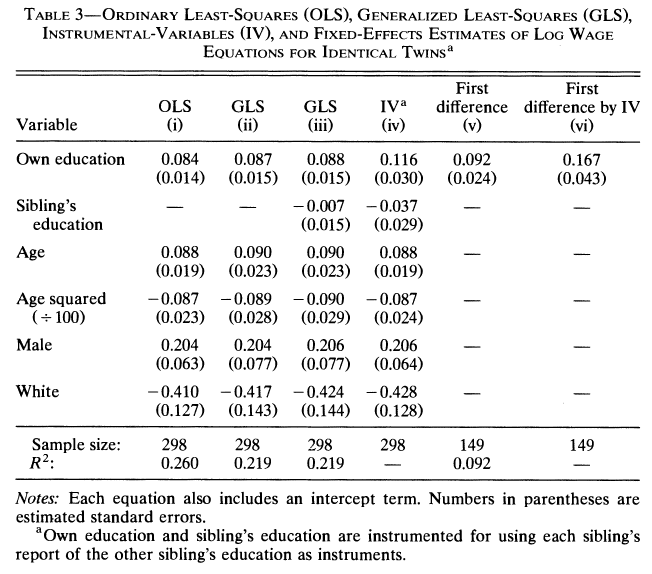

The coefficient on education in the two twin-difference OLS regression are similar to each other. However, they are higher than the coefficient found in column (v) of Table 3 as well as the coefficients found in the stacked data regressions.

### E. Twin-Differenced IV. 
Continue with the twin-differenced data on whites. 
- Use ivregress to generate 2SLS estimates that instrument d_educ_self with d_educ_other; include age, d_married, and d_uncov as additional regressors. 
- Inspect the first-state estimates. 
- Also, follow up with “estat firststage” to check whether the 2SLS estimate suffers from weak instruments. 
- Compare your estimates with Ashenfelter and Krueger’s twin-differenced IV estimates in table 5 as well as with your OLS estimates on the twin differenced data.